In [1]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
from plotly.offline import iplot

import plotly.express as px
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

Analyzing Dataframe

In [2]:
# Reading dataframe 
df = pd.read_csv('restaurants.csv')
df.head()

Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  
0           North Indian,  Finger Food,  Continental     4.1   2415  2000  
1                                       North Indian     4.3   2363  1500  
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000  
3  North Indian,  Mediterranean,  Asian,  Italian...     4.2   2821  1800  
4                       Mexican,  American,  Italian     4.4   1094  2000

In [3]:
# Evaluating dataframe
print('* Size of dataframe: {}\n'.format(df.shape))
print('* Datatype of columns are:\n {}\n'.format(df.info()))

* Size of dataframe: (6593, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB
* Datatype of columns are:
 None



In [4]:
df.describe()

Rating        Votes         Cost
count  6593.000000  6593.000000  6593.000000
mean      4.088200   119.420143  1102.798271
std       0.670031   261.849704   716.935212
min       1.000000     1.000000   100.000000
25%       3.900000     6.000000   500.000000
50%       4.200000    31.000000   900.000000
75%       4.400000   115.000000  1500.000000
max       5.000000  5016.000000  8000.000000

In [5]:
df['City'].value_counts()

Bangalore     1019
Delhi          734
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      414
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Kochi            2
Name: City, dtype: int64

Cities can be categorized in terms of State.

Adding State Column

In [6]:
df['State'] = df['City']
df['State'] = df['City'].replace({'Bangalore': 'Karnataka', 'Delhi':'Delhi NCR', 'Mumbai':'Maharashtra', 'Kolkata':'Bengal', 'Hyderabad':'Telangana', 'Ahmedabad':'Gujarat', 'Chennai':'Tamil Nadu', 'Pune':'Maharashtra', 'Jaipur':'Rajasthan', 'Chandigarh':'Punjab', 'Indore':'Madhya Pradesh', 'Gurgaon':'Delhi NCR', 'Noida':'Delhi NCR', 'Vadodara':'Gujarat', 'Lucknow':'Uttar Pradesh', 'Agra':'Uttar Pradesh', 'Nagpur':'Maharashtra', 'Surat':'Gujarat', 'Ludhiana':'Punjab', 'Goa':'Goa', 'Ghaziabad':'Delhi NCR', 'Udaipur':'Rajasthan', 'Kochi':'Kerala'})
df['State'].value_counts()

Maharashtra       1144
Delhi NCR         1114
Karnataka         1019
Bengal             712
Telangana          589
Gujarat            569
Tamil Nadu         388
Punjab             326
Rajasthan          311
Madhya Pradesh     204
Uttar Pradesh      155
Goa                 60
Kerala               2
Name: State, dtype: int64

Kochi has just two restaurants.

Removing Kochi

In [7]:
kochi_df = df[df['City']=='Kochi']
kochi_df.index
df = df.drop(kochi_df.index)
df['City'].value_counts()

Bangalore     1019
Delhi          734
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      414
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Name: City, dtype: int64

Distribution of restaurant ratings, cost and votes in India

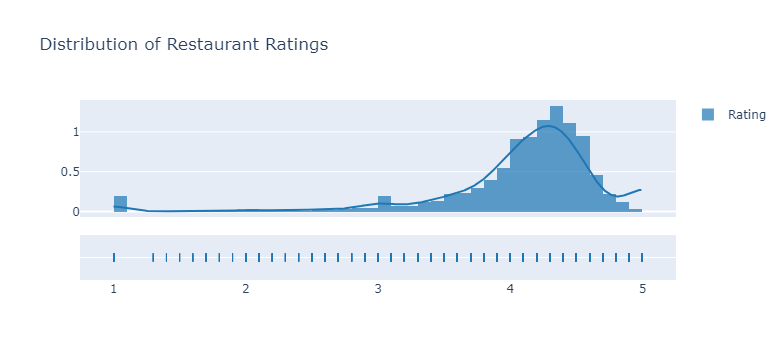

In [8]:
fig = ff.create_distplot([df.Rating],['Rating'],bin_size = 0.1)
fig.update_layout(title_text = 'Distribution of Restaurant Ratings')

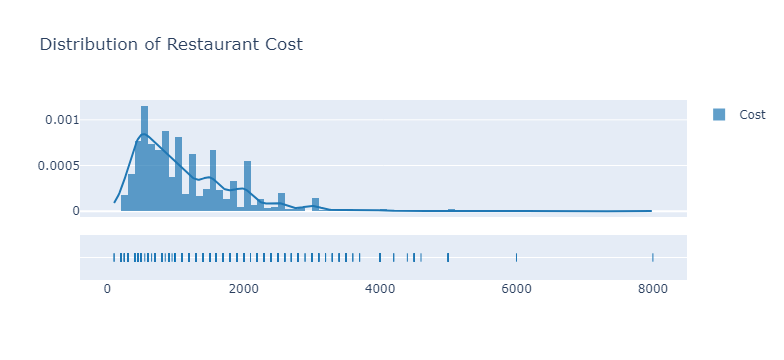

In [9]:
fig = ff.create_distplot([df.Cost],['Cost'], bin_size = 100)
fig.update_layout(title_text='Distribution of Restaurant Cost')

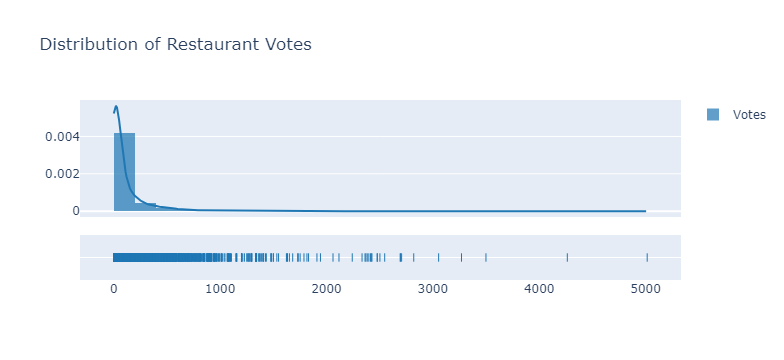

In [10]:
fig = ff.create_distplot([df.Votes], ['Votes'], bin_size = 200)
fig.update_layout(title_text='Distribution of Restaurant Votes')

The above distribution do not provide analysis in terms of states or cities. The region-wise restaurant performance is evaluated in following sections.

Inference 1: How are restaurants distributed across India?

In [11]:
# Forming dataframes in term of cities and state
city_restaurants = df.groupby('City').sum()
state_restaurants = df.groupby('State').sum()

# List of states
rest_states = df['State'].value_counts()
rest_states

Maharashtra       1144
Delhi NCR         1114
Karnataka         1019
Bengal             712
Telangana          589
Gujarat            569
Tamil Nadu         388
Punjab             326
Rajasthan          311
Madhya Pradesh     204
Uttar Pradesh      155
Goa                 60
Name: State, dtype: int64

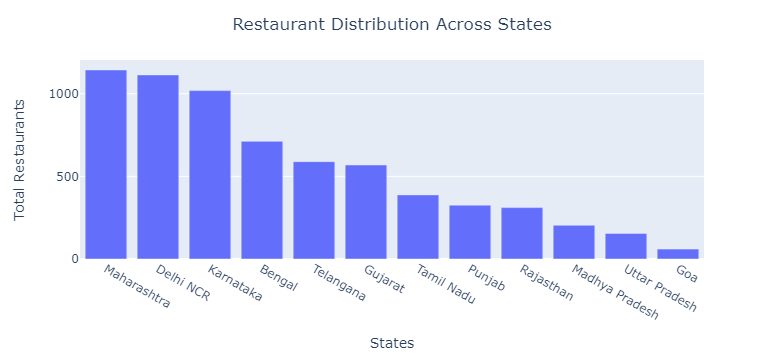

In [12]:
fig = px.bar(x = rest_states.index, y = rest_states)
fig.update_layout(xaxis_title = 'States', yaxis_title = 'Total Restaurants', 
                  title_text = 'Restaurant Distribution Across States', 
                  title_x = 0.5)
fig.show()

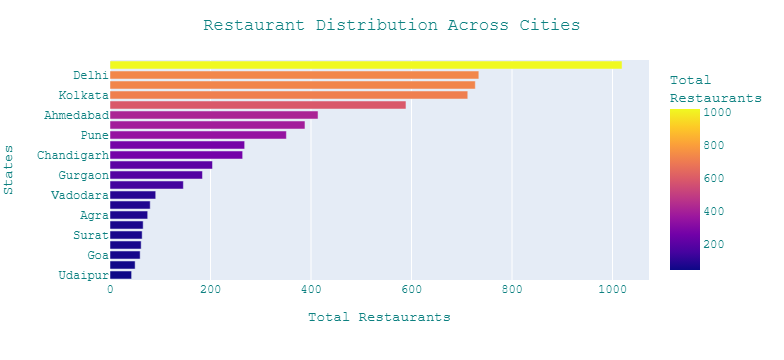

In [13]:
restnt_city = df['City'].value_counts().sort_values(ascending = True) 

fig = px.bar(y = restnt_city.index, x=restnt_city, color=restnt_city, orientation = 'h',
            labels = {
                'color': 'Total' +'<br>'+ 'Restaurants'
            }) # color continuous scale
fig.update_layout(yaxis_title = 'States', xaxis_title = 'Total Restaurants', 
                  title_text='Restaurant Distribution Across Cities', 
                  title_x=0.5,
                  font=dict(
                      family="Courier New, monospace",
                      size=12,
                      color='rgb(12, 128, 128)'
                  )
                  )
fig.show()

Inference 2: How are average ratings distributed across India?

In [14]:
df.head()

Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  \
0           North Indian,  Finger Food,  Continental     4.1   2415  2000   
1                                       North Indian     4.3   2363  1500   
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000   
3  North Indian,  Mediterranean,  Asian,  Italian...     4.2   2821  1800   
4                       Mexican,  American,  Italian     4.4   1094  2000   

       State  
0  Delhi NCR  
1  Delhi NCR  
2  Delhi NCR  
3  Delhi NCR  
4  Delhi NCR

2.1 State-Wise Distribution

In [15]:
# Forming state-wise dataframe
df_state = df.groupby('State').mean()
df_state.reset_index(level = 0, inplace = True)
df_state

State    Rating       Votes         Cost
0           Bengal  3.990590  108.025281   880.897472
1        Delhi NCR  4.196589  268.772890  1516.921005
2              Goa  4.153333   27.216667  1480.000000
3          Gujarat  4.164675   43.014060   743.233743
4        Karnataka  4.029931  100.210010   924.288518
5   Madhya Pradesh  3.790686   55.382353  1017.892157
6      Maharashtra  4.146591  100.781469  1205.594406
7           Punjab  4.094785   47.055215  1033.742331
8        Rajasthan  4.090032   40.488746  1145.337621
9       Tamil Nadu  4.025258   80.074742   937.113402
10       Telangana  4.040917  155.466893  1114.940577
11   Uttar Pradesh  4.123871   36.180645  1280.645161

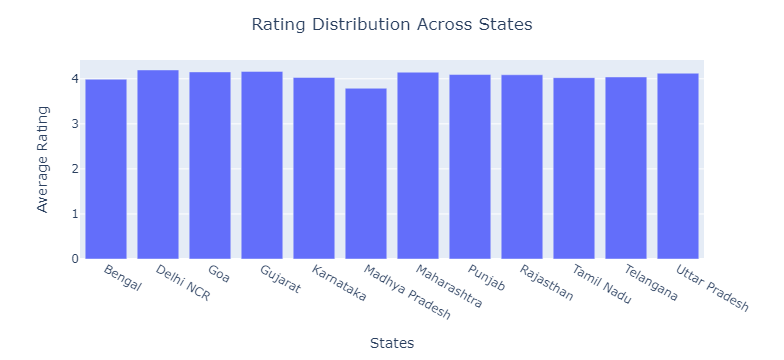

In [16]:
fig = px.bar(df_state, x = 'State', y = 'Rating')
fig.update_layout(xaxis_title = 'States', yaxis_title = 'Average Rating', 
                  title_text = 'Rating Distribution Across States', 
                  title_x = 0.5)
fig.show()

The bar graph shows that rating variation is quite small for different states.

Comparing Ratings with Polar Bar Plot

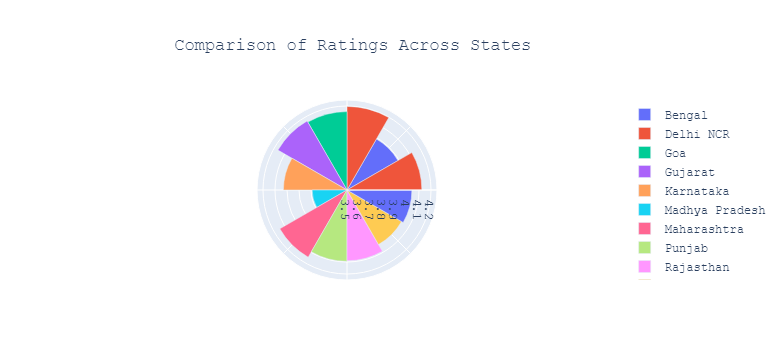

In [17]:
labels = df_state['State']
x1 = df_state['Rating']

num_slices = len(x1)
theta = [(i+1.5)*360/num_slices for i in range(num_slices)]
r=x1
width = [360 / num_slices for _ in range(num_slices)]


barpolar_plots = [go.Barpolar(r=[r], theta=[t], width=[w], name=n)
for r, t, w, n in zip(r, theta, width, labels)]

fig = go.Figure(barpolar_plots)

fig.update_layout(polar = dict(
                        radialaxis = dict(range=[3.5, 4.25], showticklabels=True),
                        angularaxis = dict(showticklabels=False, ticks='')
                        ),
                    title_text='Comparison of Ratings Across States', 
                    title_x=0.45,
                    font=dict(
                      family="Courier New, monospace",
                      size=12,
                  )
)
fig.show()

2.2 City-Wise Distribution

In [18]:
df_city = df.groupby('City').mean()
df_city.reset_index(level = 0, inplace = True)
df_city

City    Rating       Votes         Cost
0         Agra  4.238667   19.613333  1320.000000
1    Ahmedabad  4.202899   50.422705   777.294686
2    Bangalore  4.029931  100.210010   924.288518
3   Chandigarh  4.137500   53.083333   984.848485
4      Chennai  4.025258   80.074742   937.113402
5        Delhi  4.176567  304.476839  1526.634877
6    Ghaziabad  4.086000  128.800000  1374.000000
7          Goa  4.153333   27.216667  1480.000000
8      Gurgaon  4.308696  218.353261  1610.326087
9    Hyderabad  4.040917  155.466893  1114.940577
10      Indore  3.790686   55.382353  1017.892157
11      Jaipur  4.092910   43.783582  1149.253731
12     Kolkata  3.990590  108.025281   880.897472
13     Lucknow  4.016250   51.712500  1243.750000
14    Ludhiana  3.912903   21.387097  1241.935484
15      Mumbai  4.180330  110.430536  1271.733150
16      Nagpur  4.136364   20.151515  1056.060606
17       Noida  4.193836  200.753425  1399.315068
18        Pune  4.078632   95.957265  1096.723647
19       Surat  3.964062   33.500000   709.375000
20     Udaipur  4.072093   19.953488  1120.930233
21    Vadodara  4.131868   16.000000   612.087912

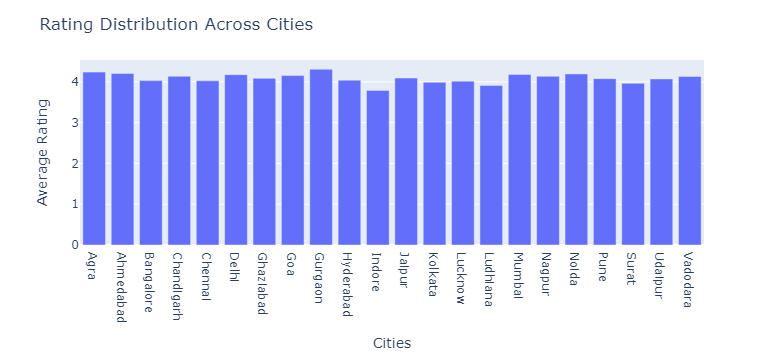

In [19]:
fig = px.bar(df_city, x = 'City', y = 'Rating')
fig.update_layout(xaxis_title = 'Cities', yaxis_title = 'Average Rating', 
                  title_text='Rating Distribution Across Cities')
fig.show()

The bar graph shows that rating variation is small for different cities.

Comparing Ratings with Polar Bar Plot

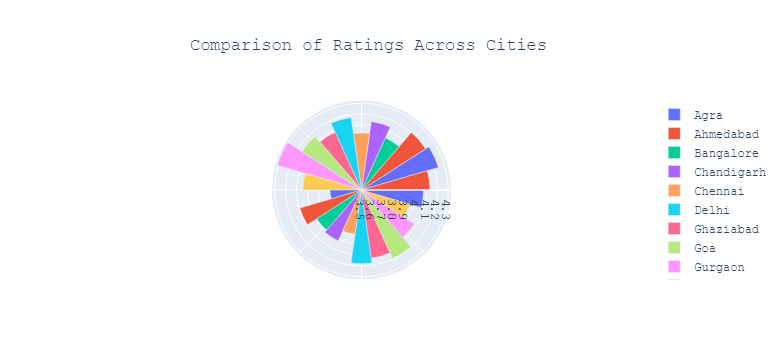

In [20]:
labels = df_city['City']
x1 = df_city['Rating']

num_slices = len(x1)
theta = [(i+1.5)*360/num_slices for i in range(num_slices)]
r=x1
width = [360 / num_slices for _ in range(num_slices)]

barpolar_plots = [go.Barpolar(r=[r], theta=[t], width=[w], name=n)
for r, t, w, n in zip(r, theta, width, labels)]

fig = go.Figure(barpolar_plots)


fig.update_layout(#     template='ggplot2',
                    polar = dict(
                        radialaxis = dict(range=[3.5, 4.33], showticklabels=True),
                        angularaxis = dict(showticklabels=False, ticks='')
                        ),
                    yaxis_title = 'States', xaxis_title = 'Total Restaurants', 
                    title_text='Comparison of Ratings Across Cities', 
                    title_x=0.47,
                    font=dict(
                      family="Courier New, monospace",
                      size=12,
#                       color='rgb(12, 128, 128)'
                  )
)
fig.show()

The bar graph shows that rating variation is small for different cities.

Inference 3: How is cost distributed across India?

3.1 State-wise Distribution

In [21]:
df_state

State    Rating       Votes         Cost
0           Bengal  3.990590  108.025281   880.897472
1        Delhi NCR  4.196589  268.772890  1516.921005
2              Goa  4.153333   27.216667  1480.000000
3          Gujarat  4.164675   43.014060   743.233743
4        Karnataka  4.029931  100.210010   924.288518
5   Madhya Pradesh  3.790686   55.382353  1017.892157
6      Maharashtra  4.146591  100.781469  1205.594406
7           Punjab  4.094785   47.055215  1033.742331
8        Rajasthan  4.090032   40.488746  1145.337621
9       Tamil Nadu  4.025258   80.074742   937.113402
10       Telangana  4.040917  155.466893  1114.940577
11   Uttar Pradesh  4.123871   36.180645  1280.645161

Cost distribution across states

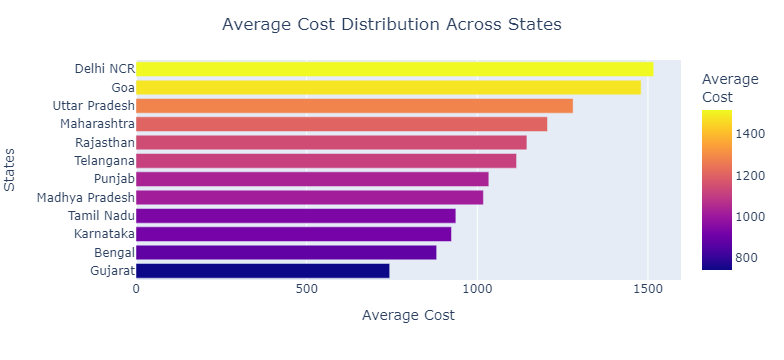

In [22]:
df_state.sort_values(by = ['Cost'], inplace = True)

fig = px.bar(df_state, x = 'Cost', y='State', color = 'Cost', orientation = 'h',
            labels = {
                'Cost': 'Average' +'<br>'+ 'Cost'
            })
fig.update_layout(yaxis_title = 'States', xaxis_title = 'Average Cost', 
                  title_text='Average Cost Distribution Across States', 
                  title_x=0.5)
fig.show()

3.2 City-wise Distribution

In [23]:
df_city

City    Rating       Votes         Cost
0         Agra  4.238667   19.613333  1320.000000
1    Ahmedabad  4.202899   50.422705   777.294686
2    Bangalore  4.029931  100.210010   924.288518
3   Chandigarh  4.137500   53.083333   984.848485
4      Chennai  4.025258   80.074742   937.113402
5        Delhi  4.176567  304.476839  1526.634877
6    Ghaziabad  4.086000  128.800000  1374.000000
7          Goa  4.153333   27.216667  1480.000000
8      Gurgaon  4.308696  218.353261  1610.326087
9    Hyderabad  4.040917  155.466893  1114.940577
10      Indore  3.790686   55.382353  1017.892157
11      Jaipur  4.092910   43.783582  1149.253731
12     Kolkata  3.990590  108.025281   880.897472
13     Lucknow  4.016250   51.712500  1243.750000
14    Ludhiana  3.912903   21.387097  1241.935484
15      Mumbai  4.180330  110.430536  1271.733150
16      Nagpur  4.136364   20.151515  1056.060606
17       Noida  4.193836  200.753425  1399.315068
18        Pune  4.078632   95.957265  1096.723647
19       Surat  3.964062   33.500000   709.375000
20     Udaipur  4.072093   19.953488  1120.930233
21    Vadodara  4.131868   16.000000   612.087912

Cost distribution across cities

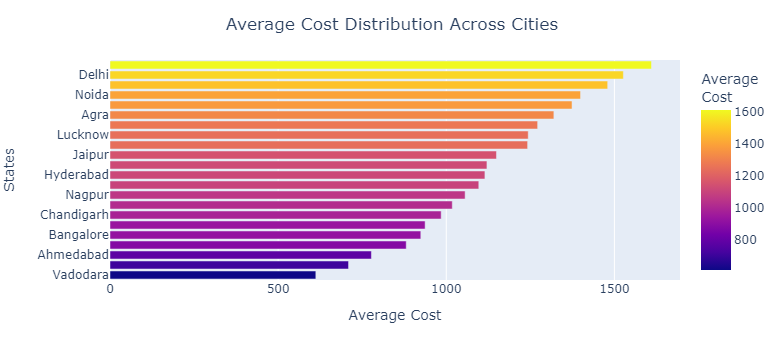

In [24]:
df_city.sort_values(by = ['Cost'], inplace = True)
df_city
fig = px.bar(df_city, x = 'Cost', y = 'City', color = 'Cost', orientation = 'h',
            labels = {
                'Cost': 'Average' +'<br>'+ 'Cost'
            })
fig.update_layout(yaxis_title = 'States', xaxis_title = 'Average Cost', 
                  title_text = 'Average Cost Distribution Across Cities', 
                  title_x = 0.5)

fig.show()

Inference 4: How are votes distributed across India?

4.1 State-wise Distribution

In [25]:
df_state

State    Rating       Votes         Cost
3          Gujarat  4.164675   43.014060   743.233743
0           Bengal  3.990590  108.025281   880.897472
4        Karnataka  4.029931  100.210010   924.288518
9       Tamil Nadu  4.025258   80.074742   937.113402
5   Madhya Pradesh  3.790686   55.382353  1017.892157
7           Punjab  4.094785   47.055215  1033.742331
10       Telangana  4.040917  155.466893  1114.940577
8        Rajasthan  4.090032   40.488746  1145.337621
6      Maharashtra  4.146591  100.781469  1205.594406
11   Uttar Pradesh  4.123871   36.180645  1280.645161
2              Goa  4.153333   27.216667  1480.000000
1        Delhi NCR  4.196589  268.772890  1516.921005

Cost distribution across states

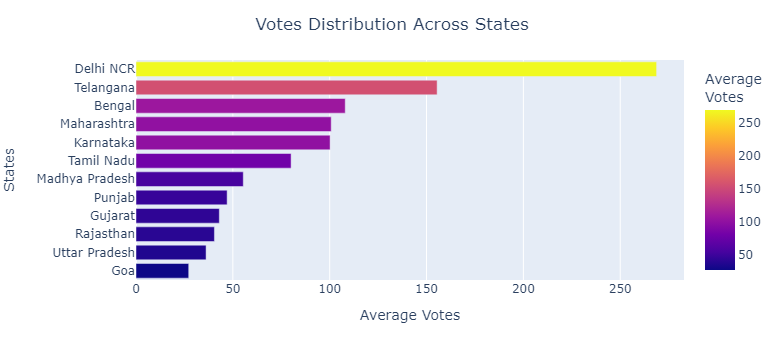

In [26]:
df_state.sort_values(by=['Votes'], inplace = True)

fig = px.bar(df_state, x = 'Votes', y = 'State', color = 'Votes', orientation = 'h',
            labels = {
                'Votes': 'Average' +'<br>'+ 'Votes'
            })
fig.update_layout(yaxis_title = 'States', xaxis_title = 'Average Votes', 
                  title_text = 'Votes Distribution Across States', 
                  title_x=0.5)
                  
fig.show()

4.2 City-wise Distribution

Votes distribuion across cities

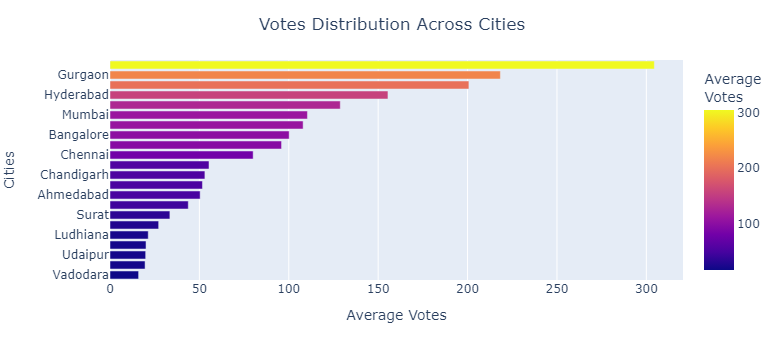

In [27]:
df_city.sort_values(by=['Votes'], inplace=True)

fig = px.bar(df_city, x = 'Votes', y='City', color = 'Votes', orientation = 'h',
            labels = {
                'Votes': 'Average' +'<br>'+ 'Votes'
            })
fig.update_layout(yaxis_title = 'Cities', xaxis_title = 'Average Votes', 
                  title_text='Votes Distribution Across Cities', 
                  title_x=0.5)
                
fig.show()

Inference 5: How is the overall performance of restaurants across different states?

5.1 Adding Attributes to State Dataframe

In [28]:
rest_states

Maharashtra       1144
Delhi NCR         1114
Karnataka         1019
Bengal             712
Telangana          589
Gujarat            569
Tamil Nadu         388
Punjab             326
Rajasthan          311
Madhya Pradesh     204
Uttar Pradesh      155
Goa                 60
Name: State, dtype: int64

Extracting total restaurants in each state and forming its dataframe

In [29]:
a = rest_states.index
b = rest_states
df_state_restnts = pd.DataFrame(list(zip(a,b)))
df_state_restnts.columns = ['State', 'Total Restaurants']
df_state_restnts = df_state_restnts.set_index('State')
display(df_state_restnts)

Total Restaurants
State                            
Maharashtra                  1144
Delhi NCR                    1114
Karnataka                    1019
Bengal                        712
Telangana                     589
Gujarat                       569
Tamil Nadu                    388
Punjab                        326
Rajasthan                     311
Madhya Pradesh                204
Uttar Pradesh                 155
Goa                            60

In [30]:
df_state

State    Rating       Votes         Cost
2              Goa  4.153333   27.216667  1480.000000
11   Uttar Pradesh  4.123871   36.180645  1280.645161
8        Rajasthan  4.090032   40.488746  1145.337621
3          Gujarat  4.164675   43.014060   743.233743
7           Punjab  4.094785   47.055215  1033.742331
5   Madhya Pradesh  3.790686   55.382353  1017.892157
9       Tamil Nadu  4.025258   80.074742   937.113402
4        Karnataka  4.029931  100.210010   924.288518
6      Maharashtra  4.146591  100.781469  1205.594406
0           Bengal  3.990590  108.025281   880.897472
10       Telangana  4.040917  155.466893  1114.940577
1        Delhi NCR  4.196589  268.772890  1516.921005

In [31]:
# Taking State column in dataframe as index
df_state = df_state.set_index('State')
df_state

Rating       Votes         Cost
State                                            
Goa             4.153333   27.216667  1480.000000
Uttar Pradesh   4.123871   36.180645  1280.645161
Rajasthan       4.090032   40.488746  1145.337621
Gujarat         4.164675   43.014060   743.233743
Punjab          4.094785   47.055215  1033.742331
Madhya Pradesh  3.790686   55.382353  1017.892157
Tamil Nadu      4.025258   80.074742   937.113402
Karnataka       4.029931  100.210010   924.288518
Maharashtra     4.146591  100.781469  1205.594406
Bengal          3.990590  108.025281   880.897472
Telangana       4.040917  155.466893  1114.940577
Delhi NCR       4.196589  268.772890  1516.921005

In [32]:
# Matching indices of df_state_restnts with df_state 
df_state_restnts.reindex(df_state.index)

Total Restaurants
State                            
Goa                            60
Uttar Pradesh                 155
Rajasthan                     311
Gujarat                       569
Punjab                        326
Madhya Pradesh                204
Tamil Nadu                    388
Karnataka                    1019
Maharashtra                  1144
Bengal                        712
Telangana                     589
Delhi NCR                    1114

In [33]:
# Adding total restaurants column to state dataframe  
df_state['Total Restaurants'] = df_state_restnts['Total Restaurants']
df_state

Rating       Votes         Cost  Total Restaurants
State                                                               
Goa             4.153333   27.216667  1480.000000                 60
Uttar Pradesh   4.123871   36.180645  1280.645161                155
Rajasthan       4.090032   40.488746  1145.337621                311
Gujarat         4.164675   43.014060   743.233743                569
Punjab          4.094785   47.055215  1033.742331                326
Madhya Pradesh  3.790686   55.382353  1017.892157                204
Tamil Nadu      4.025258   80.074742   937.113402                388
Karnataka       4.029931  100.210010   924.288518               1019
Maharashtra     4.146591  100.781469  1205.594406               1144
Bengal          3.990590  108.025281   880.897472                712
Telangana       4.040917  155.466893  1114.940577                589
Delhi NCR       4.196589  268.772890  1516.921005               1114

In [34]:
# Normalizing columns with integer values
df_state_normalized = df_state.copy()
columns = ['Rating', 'Votes', 'Cost', 'Total Restaurants']

# apply normalization techniques
for column in columns:
    df_state_normalized[column] = (df_state_normalized[column] / df_state_normalized[column].abs().max())

# view normalized data
df_state_normalized.reset_index(level=0, inplace=True)
display(df_state_normalized)

State    Rating     Votes      Cost  Total Restaurants
0              Goa  0.989693  0.101263  0.975661           0.052448
1    Uttar Pradesh  0.982672  0.134614  0.844240           0.135490
2        Rajasthan  0.974609  0.150643  0.755041           0.271853
3          Gujarat  0.992395  0.160039  0.489962           0.497378
4           Punjab  0.975741  0.175074  0.681474           0.284965
5   Madhya Pradesh  0.903278  0.206056  0.671025           0.178322
6       Tamil Nadu  0.959174  0.297927  0.617773           0.339161
7        Karnataka  0.960287  0.372843  0.609319           0.890734
8      Maharashtra  0.988086  0.374969  0.794764           1.000000
9           Bengal  0.950913  0.401920  0.580714           0.622378
10       Telangana  0.962905  0.578432  0.735002           0.514860
11       Delhi NCR  1.000000  1.000000  1.000000           0.973776

5.2 Comparing Attributes of all States

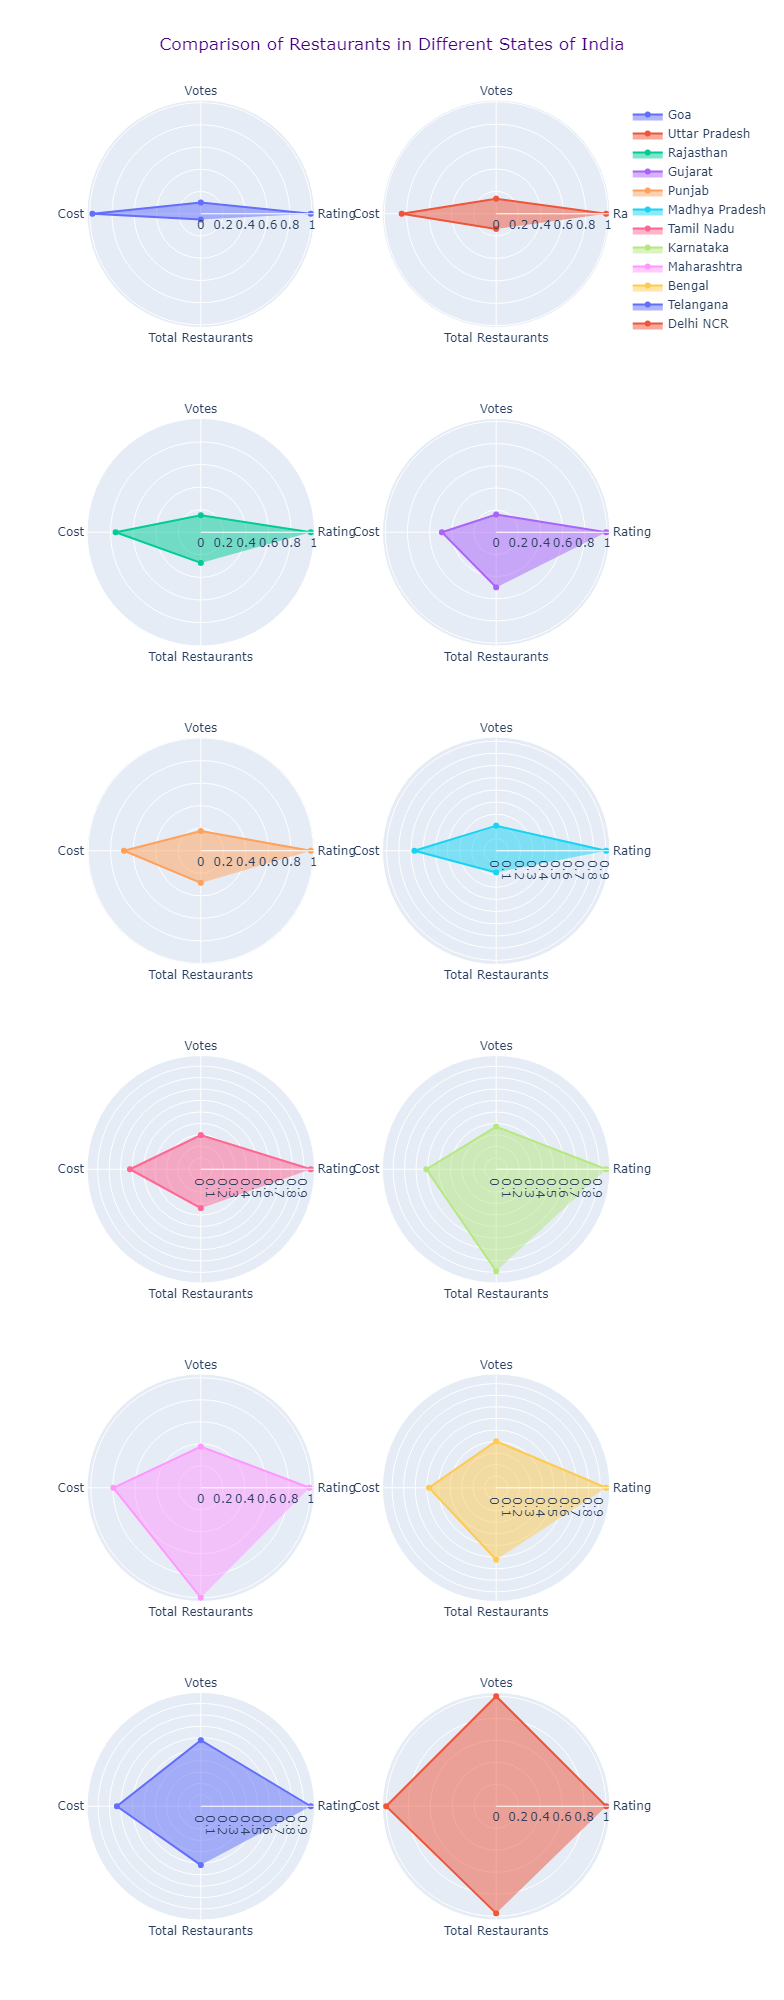

In [35]:
# Comparing attributes of all states using polar scatter plots

fig = make_subplots(rows=6, cols=2, specs=[[{'type': 'polar'}]*2]*6, column_widths=[0.45, 0.45])

for index, state in enumerate(df_state_normalized['State']):
    if index % 2 == 0:
        row = int((index+2)/2)
        col = 1
    else: 
        row = int((index+1)/2) 
        col = 2
      
    fig.add_trace(go.Scatterpolar(
          name = df_state_normalized['State'][index],
          r = [df_state_normalized['Rating'][index], df_state_normalized['Votes'][index], df_state_normalized['Cost'][index], df_state_normalized['Total Restaurants'][index]],
          theta = ['Rating', 'Votes', 'Cost', 'Total Restaurants'],
          fill = 'toself'    
        ), row, col)

fig.update_layout(height = 2000, width = 900, title_text = "Comparison of Restaurants in Different States of India", title_x=0.5, title_font_color = '#4B0082')
fig.show()

Inference 6: What are top cuisines in India?

6.1 Forming Cuisines Dataframe

In [36]:
df.head()

Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  \
0           North Indian,  Finger Food,  Continental     4.1   2415  2000   
1                                       North Indian     4.3   2363  1500   
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000   
3  North Indian,  Mediterranean,  Asian,  Italian...     4.2   2821  1800   
4                       Mexican,  American,  Italian     4.4   1094  2000   

       State  
0  Delhi NCR  
1  Delhi NCR  
2  Delhi NCR  
3  Delhi NCR  
4  Delhi NCR

In [37]:
cuisines = df['Cuisine'].str.split(',').explode().unique().tolist()

In [38]:
# Forming cuisine dataframe
data = []
df_filtered = pd.DataFrame()
columns = ['Cuisine', 'Total Restaurants', 'Rating']
df_cuisine = pd.DataFrame(columns = columns)

for cuisine in cuisines:
    
    df['Cuisine Verification'] = df['Cuisine'].str.contains(cuisine, case=False, na=False).astype(int)
    df_filtered = df[df['Cuisine Verification'] == 1]
    total_restnt = len(df_filtered.index)
    df = df.drop(['Cuisine Verification'], axis=1)
    
    avg_rating = df_filtered['Rating'].sum()/total_restnt
    df_cuisine = df_cuisine.append({'Cuisine': cuisine, 'Total Restaurants': total_restnt, 'Rating':avg_rating, }, ignore_index=True)

In [39]:
df_cuisine.head()

Cuisine Total Restaurants    Rating
0    North Indian              3296  4.070995
1     Finger Food               155  4.083871
2     Continental              1391  4.148311
3     Finger Food               312  4.087821
4    North Indian              1068  4.108989

In [40]:
df_cuisine.shape

(170, 3)

6.2 Identifying Top Cuisines

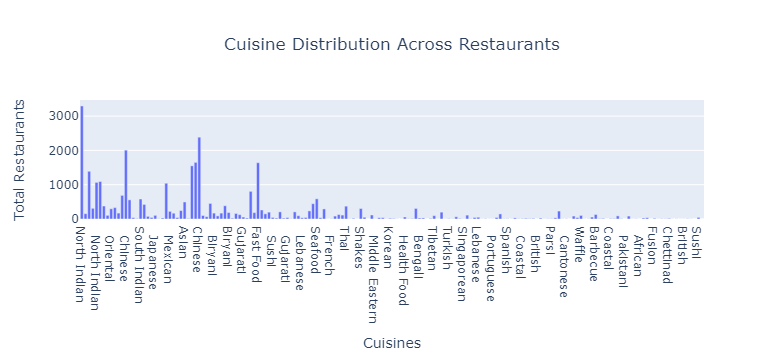

In [41]:
fig = go.Figure(data = [
    go.Bar(name = 'Total Restaurants', x = df_cuisine['Cuisine'], y = df_cuisine['Total Restaurants'])
])
fig.update_layout(xaxis_title = 'Cuisines', yaxis_title = 'Total Restaurants', 
                  title_text='Cuisine Distribution Across Restaurants', 
                  title_x=0.5)
fig.show()

Many cuisines are served in very few restaurants.

Filtering cuisines

In [42]:
# Taking cuisines that are atleast served in over 300 restaurants 
df_cuisine = df_cuisine[df_cuisine['Total Restaurants'] > 300]
df_cuisine.shape

(26, 3)

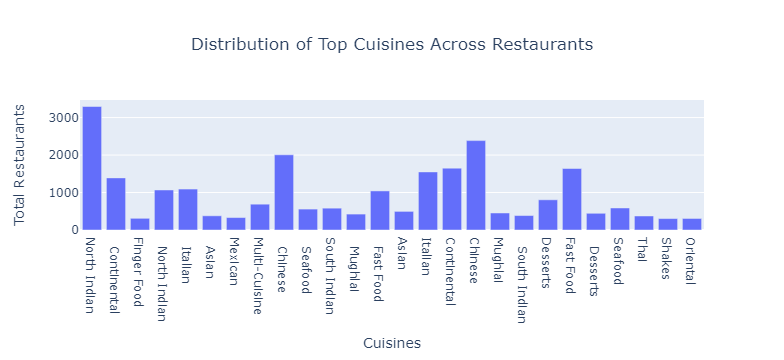

In [43]:
fig = go.Figure(data = [
    go.Bar(name = 'Total Restaurants', x = df_cuisine['Cuisine'], y = df_cuisine['Total Restaurants'])
])

fig.update_layout(xaxis_title = 'Cuisines', yaxis_title = 'Total Restaurants', 
                  title_text = 'Distribution of Top Cuisines Across Restaurants', 
                  title_x = 0.5)
fig.show()

Cuisines dataframe consists of duplicate values.
Multi-Cuisine is not a valid category.

In [44]:
# Printing some duplicate categories
df_cuisine.Cuisine[0], df_cuisine.Cuisine[13], df_cuisine.Cuisine[0], df_cuisine.Cuisine[64]

('North Indian', '  Seafood', 'North Indian', 'Seafood')

Double spacing before text is resulting in dupicates.

In [45]:
#  Reseting index and removing double space 
df_cuisine = df_cuisine.reset_index(drop = True)   
df_cuisine.Cuisine = df_cuisine.Cuisine.str.replace('  ', '')

# Verifying double space removal
df_cuisine.Cuisine[5], df_cuisine.Cuisine[13], df_cuisine.Cuisine[0], df_cuisine.Cuisine[3]

('Asian', 'Asian', 'North Indian', 'North Indian')

In [46]:
#  Identifying with duplicate values
duplicate_cuisine = df_cuisine.duplicated(subset = ['Cuisine'])

In [47]:
duplicate_cuisines = []
duplicate_cuisines = df_cuisine.loc[duplicate_cuisine]['Cuisine']
duplicate_cuisines

3     North Indian
13           Asian
14         Italian
15     Continental
16         Chinese
17         Mughlai
18    South Indian
20       Fast Food
21        Desserts
22         Seafood
Name: Cuisine, dtype: object

In [48]:
duplicate_indices = []

# Identifying indices dulplicate cuisines 
duplicate_bool = []
count = 0
for index, cuisine in enumerate(duplicate_cuisines):
    duplicate_bool = df_cuisine['Cuisine'].str.find(cuisine)

    for index, value in enumerate(duplicate_bool):
        if value == 0:
            duplicate_indices.append(index)
duplicate_indices

[0, 3, 5, 13, 4, 14, 1, 15, 8, 16, 11, 17, 10, 18, 12, 20, 19, 21, 9, 22]

In [49]:
# Removing duplicate indices and updating attributes
i = 0
for index in duplicate_indices:
    
    if (i) % 2 == 0:
        count = 0
        # Updating attributes in first duplicate index (or Original Index)
        total_restnt_1 = (df_cuisine['Total Restaurants'][index])
        avg_rating_1 = df_cuisine['Rating'][index]
    
    else:
        count = 2
        total_restnt_2 = (df_cuisine['Total Restaurants'][index])
        avg_rating_2 = df_cuisine['Rating'][index]
    
    i += 1
    if count == 2:
        df_cuisine['Total Restaurants'][(index-1)] = (total_restnt_1 + total_restnt_2)
        df_cuisine['Rating'][(index-1)] = ((total_restnt_1*avg_rating_1) + (total_restnt_2*avg_rating_2))/(total_restnt_1 + total_restnt_2)
        
        # Removing second duplicate index
        df_cuisine = df_cuisine.drop(index)

In [50]:
df_cuisine = df_cuisine.reset_index(drop = True)
df_cuisine

Cuisine Total Restaurants    Rating
0    North Indian              3296  4.070995
1     Continental              1391  4.148311
2     Finger Food              4364  4.080293
3         Italian              1093  4.163861
4           Asian               379  4.221108
5         Mexican               332  4.220783
6   Multi-Cuisine               689  4.146444
7         Chinese              2007  4.056951
8         Seafood               558  4.117563
9    South Indian               583  4.020583
10        Mughlai               425  4.152235
11      Fast Food               876  4.237557
12       Desserts              2517  4.099841
13           Thai               374  4.206952
14         Shakes               305  4.099344
15      Oriental                308  4.158766

In [51]:
# Dropping Multi-cuisine
df_cuisine = df_cuisine.drop(index = 6)
df_cuisine = df_cuisine.reset_index(drop = True)
df_cuisine

Cuisine Total Restaurants    Rating
0   North Indian              3296  4.070995
1    Continental              1391  4.148311
2    Finger Food              4364  4.080293
3        Italian              1093  4.163861
4          Asian               379  4.221108
5        Mexican               332  4.220783
6        Chinese              2007  4.056951
7        Seafood               558  4.117563
8   South Indian               583  4.020583
9        Mughlai               425  4.152235
10     Fast Food               876  4.237557
11      Desserts              2517  4.099841
12          Thai               374  4.206952
13        Shakes               305  4.099344
14     Oriental                308  4.158766

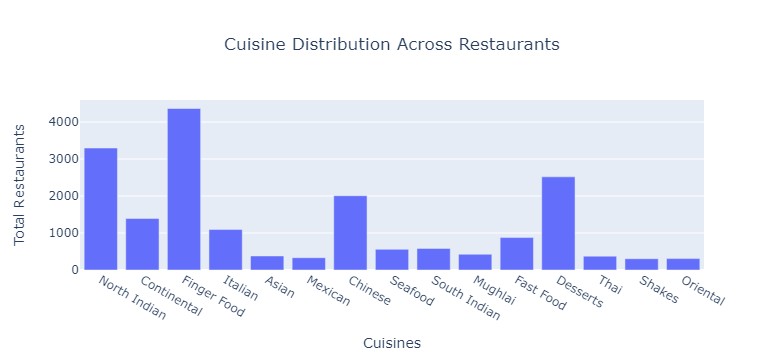

In [52]:
# Plotting cuisine with total restaurants
fig = go.Figure(data = [
    go.Bar(name = 'Total Restaurants', x = df_cuisine['Cuisine'], y = df_cuisine['Total Restaurants'])
])

fig.update_layout(xaxis_title = 'Cuisines', yaxis_title = 'Total Restaurants', 
                  title_text='Cuisine Distribution Across Restaurants', 
                  title_x=0.5)

fig.show()

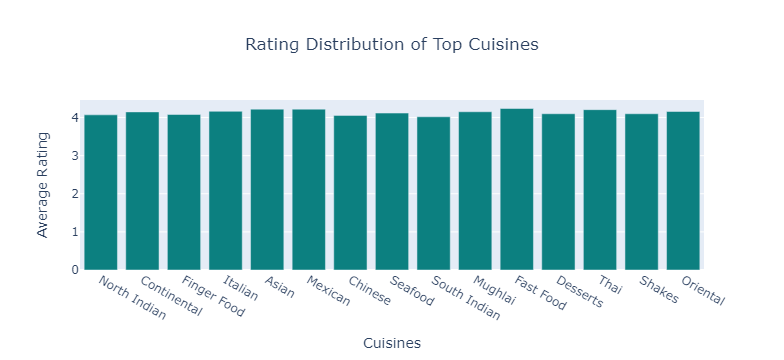

In [115]:
# Plotting rating with cuisines 
fig = go.Figure(data = [
    go.Bar(name='Rating', x=df_cuisine['Cuisine'], y=df_cuisine['Rating']),
])

fig.update_traces(marker_color ='rgb(12, 128, 128)', opacity=1)
fig.update_layout(xaxis_title = 'Cuisines', yaxis_title = 'Average Rating', 
                  title_text = 'Rating Distribution of Top Cuisines', 
                  title_x = 0.5)

fig.show()

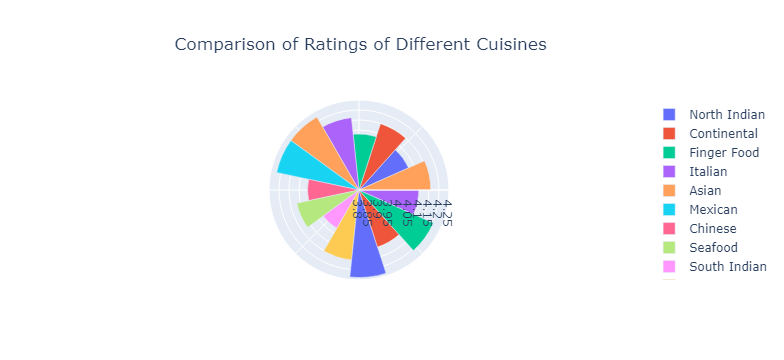

In [54]:
# Analysing with polar plot 
labels = df_cuisine['Cuisine']
x1 = df_cuisine['Rating']
num_slices = len(x1)
theta = [(i+1.5)*360/num_slices for i in range(num_slices)]
r=x1
width = [360 / num_slices for _ in range(num_slices)]

barpolar_plots = [go.Barpolar(r=[r], theta=[t], width=[w], name=n)
for r, t, w, n in zip(r, theta, width, labels)]

fig = go.Figure(barpolar_plots)

fig.update_layout(
                    polar = dict(
                        radialaxis = dict(range=[3.8, 4.25], showticklabels = True),
                        angularaxis = dict(showticklabels = False, ticks = '')
                        ),
                    yaxis_title = 'States', xaxis_title = 'Total Restaurants', 
                    title_text = 'Comparison of Ratings of Different Cuisines', 
                    title_x = 0.46
)
fig.show()

Inference 7: How are the cuisines distributed among states?

In [55]:
df.head()

Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  \
0           North Indian,  Finger Food,  Continental     4.1   2415  2000   
1                                       North Indian     4.3   2363  1500   
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000   
3  North Indian,  Mediterranean,  Asian,  Italian...     4.2   2821  1800   
4                       Mexican,  American,  Italian     4.4   1094  2000   

       State  
0  Delhi NCR  
1  Delhi NCR  
2  Delhi NCR  
3  Delhi NCR  
4  Delhi NCR

In [56]:
df.tail()

Name                                           Location  \
6588  Shree Rathnam                 Wave Mall,BRS Nagar, West Ludhiana   
6589    Cafe Delish          Radisson Blu,Rajguru Nagar, West Ludhiana   
6590    3 K Resorts                           BRS Nagar, West Ludhiana   
6591      Dovka Bar  Nirvana Hotel Banquets Club,PAU, Central Ludhiana   
6592    Urban Vibes                         Aggar Nagar, West Ludhiana   

               Locality      City  \
6588      West Ludhiana  Ludhiana   
6589      West Ludhiana  Ludhiana   
6590      West Ludhiana  Ludhiana   
6591   Central Ludhiana  Ludhiana   
6592      West Ludhiana  Ludhiana   

                                                Cuisine  Rating  Votes  Cost  \
6588                                       South Indian     4.1     20   600   
6589  Multi-Cuisine,  North Indian,  Continental,  A...     4.4     48  3100   
6590                                       North Indian     1.0      1  1100   
6591               North Indian,  Chinese,  Finger Food     4.3      3  1500   
6592  Multi-Cuisine,  North Indian,  Italian,  Chine...     3.8     12  2000   

       State  
6588  Punjab  
6589  Punjab  
6590  Punjab  
6591  Punjab  
6592  Punjab

7.1 Declaring Function for Obtaining Cuisine Information

In [57]:
df_state = pd.DataFrame()

def cuisine_info(state):
    state_cuisines_clean =[]
    
#     Forming state dataframe
    filter = (df['State'] == state)
    df_state = df[filter].copy() 
    
#     Filtering cuisines
    state_cuisines = df_state['Cuisine'].str.split(',').explode().unique().tolist()
    
#     Removing 'Multi-Cuisine' category from cuisines    
    a = 'Multi-Cuisine'
    b = '  Multi-Cuisine'
    if a in state_cuisines:
        state_cuisines.remove('Multi-Cuisine')
    if b in state_cuisines:
        state_cuisines.remove('  Multi-Cuisine')

    
    for word in state_cuisines:
        word = word.replace('  ', '')
        state_cuisines_clean.append(word)
    
#     Removing duplicates from cuisines list
    state_cuisines_clean = np.unique(state_cuisines_clean)
    state_cuisines_clean
    
#     Forming state cuisine dataframe
    
    df_filtered = pd.DataFrame()
    df_cuisine_state = pd.DataFrame()
    # Forming cuisine df for state
    for cuisine in state_cuisines_clean:
        df_state['Cuisine Verification'] = df_state['Cuisine'].str.contains(cuisine, case=False, na=False).astype(int)
        df_filtered = df_state[df_state['Cuisine Verification'] == 1]

        total_restnt = len(df_filtered.index)
        total_votes = len(df_filtered.index)
        df_state = df_state.drop(['Cuisine Verification'], axis=1)

        avg_rating = df_filtered['Rating'].sum()/total_restnt

        df_cuisine_state = df_cuisine_state.append({'Cuisine': cuisine, 'Total Restaurants': total_restnt, 'Total Votes': total_votes, 'Rating':avg_rating}, ignore_index=True)
    
    return df_cuisine_state 


7.2 Forming Individual Cuisine Dataframes for all States

In [58]:
# Maharashtra cuisine dataframe
cuisine_maharashtra = cuisine_info('Maharashtra')
# Filtering top cusines 
top_cuisine_maharashtra = cuisine_maharashtra[cuisine_maharashtra['Total Votes']>50].reset_index(drop = True)
top_cuisine_maharashtra.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_maharashtra.reset_index(inplace = True, drop = True)
top_cuisine_maharashtra['Total Votes'] = top_cuisine_maharashtra['Total Votes'].astype('str') + ' votes'


# Delhi NCR cuisine dataframe
cuisine_delhi = cuisine_info('Delhi NCR')
# Filtering top cusines 
top_cuisine_delhi = cuisine_delhi[cuisine_delhi['Total Votes']>50].reset_index(drop = True)
top_cuisine_delhi.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_delhi.reset_index(inplace = True, drop = True)
top_cuisine_delhi['Total Votes'] = top_cuisine_delhi['Total Votes'].astype('str') + ' votes'


# Karnataka NCR cuisine dataframe
cuisine_karnataka = cuisine_info('Karnataka')
# Filtering top cusines 
top_cuisine_karnataka = cuisine_karnataka[cuisine_karnataka['Total Votes']>50].reset_index(drop = True)
top_cuisine_karnataka.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_karnataka.reset_index(inplace = True, drop = True)
top_cuisine_karnataka['Total Votes'] = top_cuisine_karnataka['Total Votes'].astype('str') + ' votes'


# Bengal cuisine dataframe
cuisine_bengal = cuisine_info('Bengal')
# Filtering top cusines 
top_cuisine_bengal = cuisine_bengal[cuisine_bengal['Total Votes']>50].reset_index(drop = True)
top_cuisine_bengal.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_bengal.reset_index(inplace = True, drop = True)
top_cuisine_bengal['Total Votes'] = top_cuisine_bengal['Total Votes'].astype('str') + ' votes'


# Telangana cuisine dataframe
cuisine_telangana = cuisine_info('Telangana')
# Filtering top cusines 
top_cuisine_telangana = cuisine_telangana[cuisine_telangana['Total Votes']>50].reset_index(drop = True)
top_cuisine_telangana.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_telangana.reset_index(inplace = True, drop = True)
top_cuisine_telangana['Total Votes'] = top_cuisine_telangana['Total Votes'].astype('str') + ' votes'


# Gujarat cuisine dataframe
cuisine_gujarat = cuisine_info('Gujarat')
# Filtering top cusines 
top_cuisine_gujarat = cuisine_gujarat[cuisine_gujarat['Total Votes']>50].reset_index(drop = True)
top_cuisine_gujarat.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_gujarat.reset_index(inplace = True, drop = True)
top_cuisine_gujarat['Total Votes'] = top_cuisine_gujarat['Total Votes'].astype('str') + ' votes'


# Tamil Nadu cuisine dataframe
cuisine_tamil = cuisine_info('Tamil Nadu')
# Filtering top cusines 
top_cuisine_tamil = cuisine_tamil[cuisine_tamil['Total Votes']>50].reset_index(drop = True)
top_cuisine_tamil.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_tamil.reset_index(inplace = True, drop=True)
top_cuisine_tamil['Total Votes'] = top_cuisine_tamil['Total Votes'].astype('str') + ' votes'


# Punjab cuisine dataframe
cuisine_punjab = cuisine_info('Punjab')
# Filtering top cusines 
top_cuisine_punjab = cuisine_punjab[cuisine_punjab['Total Votes']>50].reset_index(drop = True)
top_cuisine_punjab.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_punjab.reset_index(inplace = True, drop=True)
top_cuisine_punjab['Total Votes'] = top_cuisine_punjab['Total Votes'].astype('str') + ' votes'


# Rajasthan cuisine dataframe
cuisine_rajasthan = cuisine_info('Rajasthan')
# Filtering top cusines 
top_cuisine_rajasthan = cuisine_rajasthan[cuisine_rajasthan['Total Votes']>50].reset_index(drop = True)
top_cuisine_rajasthan.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_rajasthan.reset_index(inplace = True, drop=True)
top_cuisine_rajasthan['Total Votes'] = top_cuisine_rajasthan['Total Votes'].astype('str') + ' votes'


# Madhya Pradesh cuisine dataframe
cuisine_madhya = cuisine_info('Madhya Pradesh')
# Filtering top cusines 
top_cuisine_madhya = cuisine_madhya[cuisine_madhya['Total Votes']>50].reset_index(drop = True)
top_cuisine_madhya.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_madhya.reset_index(inplace = True, drop=True)
top_cuisine_madhya['Total Votes'] = top_cuisine_madhya['Total Votes'].astype('str') + ' votes'

# Uttar Pradesh cuisine dataframe
cuisine_uttar = cuisine_info('Uttar Pradesh')

# Filtering top cusines 
top_cuisine_uttar = cuisine_uttar[cuisine_uttar['Total Votes']>50].reset_index(drop = True)
top_cuisine_uttar.sort_values(by = 'Rating', ascending = False, inplace = True)
top_cuisine_uttar.reset_index(inplace = True, drop=True)
top_cuisine_uttar['Total Votes'] = top_cuisine_uttar['Total Votes'].astype('str') + ' votes'

7.3 Printing State-wise Cuisine Table

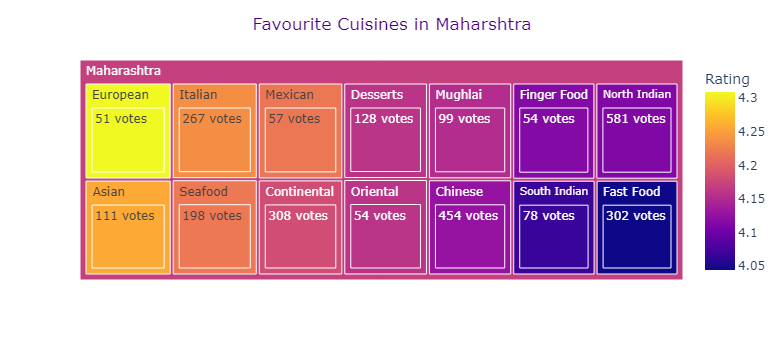

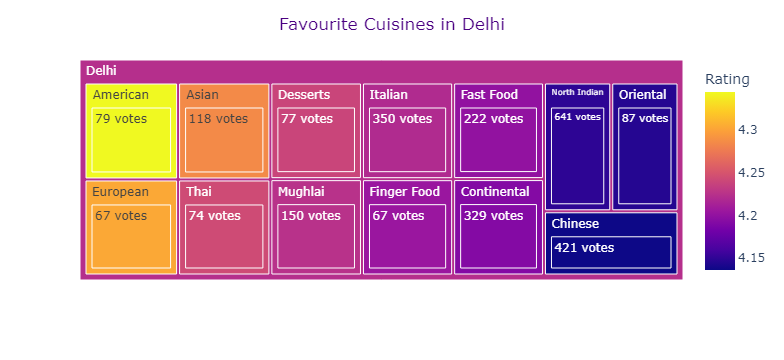

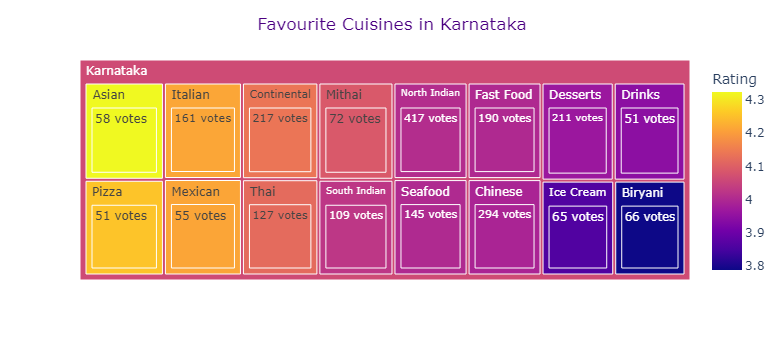

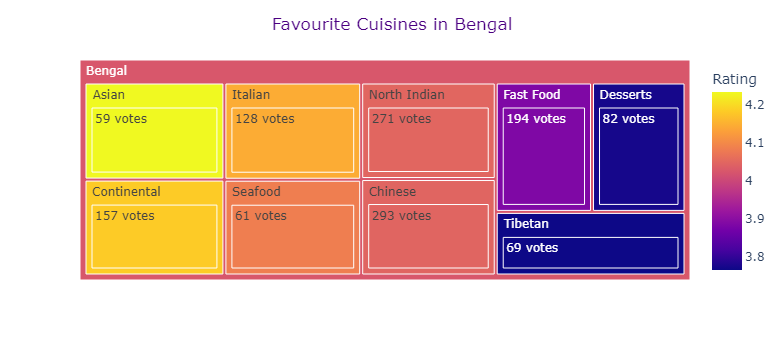

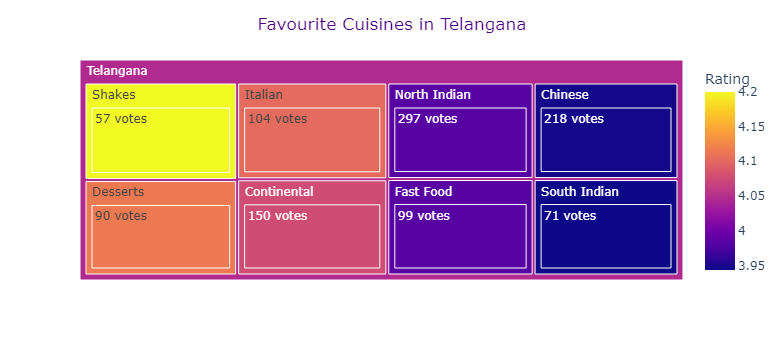

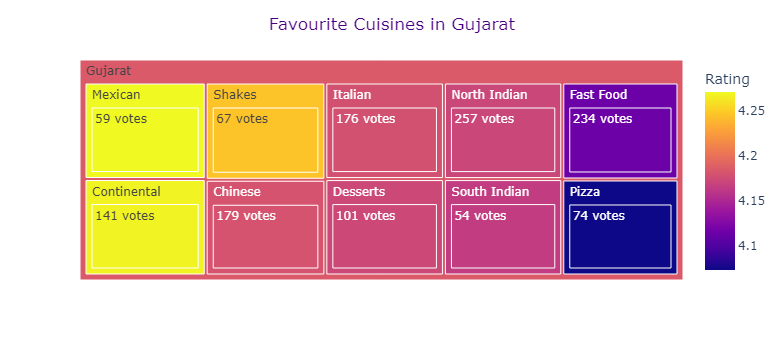

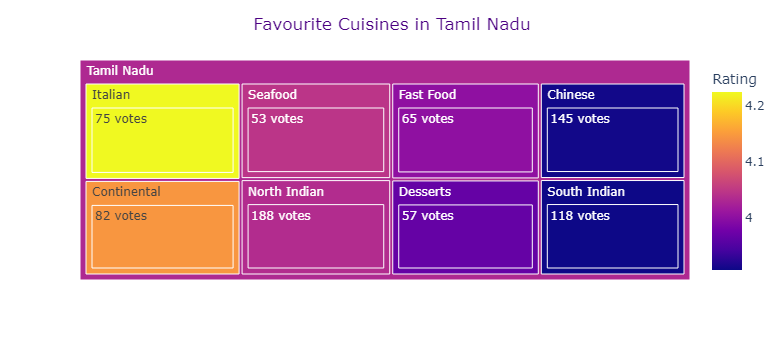

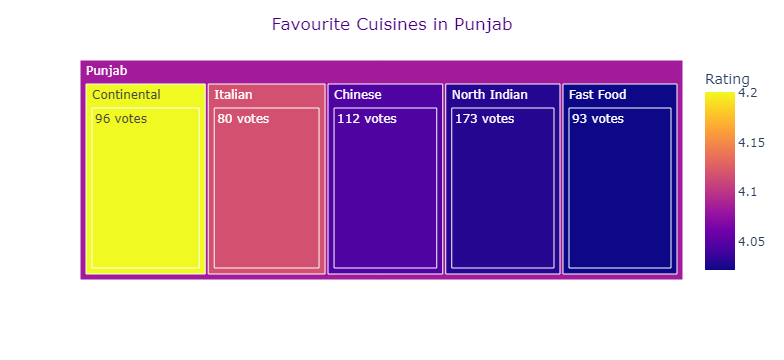

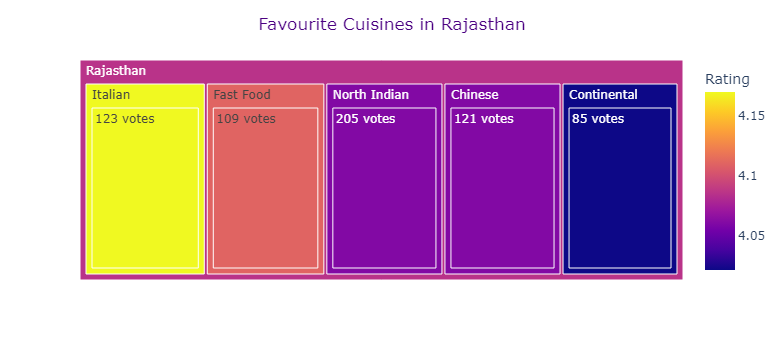

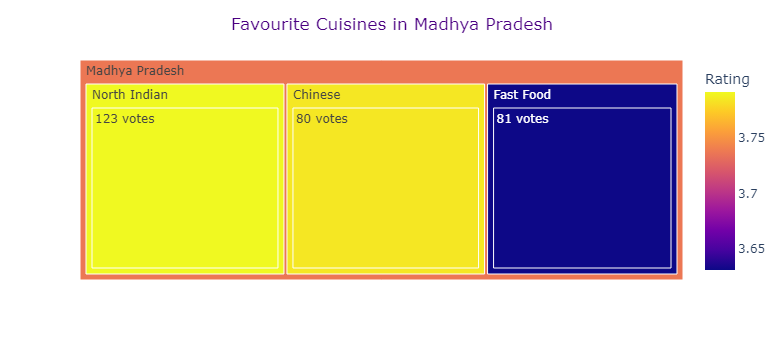

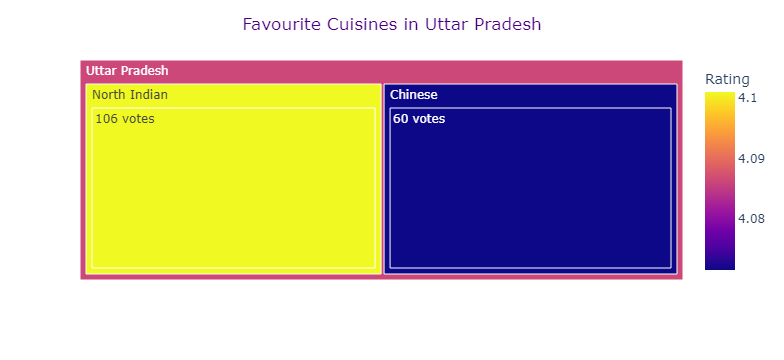

In [59]:
# Plotting Maharashtra cuisines
top_cuisine_maharashtra['State'] = 'Maharashtra'
fig = px.treemap(top_cuisine_maharashtra, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                 labels = {'Votes'}
                )
fig.update_layout( title_text = 'Favourite Cuisines in Maharshtra',
                  title_font_color = '#4B0082',
                  title_x = 0.5,
                 )
fig.show()

# Plotting Delhi cuisines
top_cuisine_delhi['State'] = 'Delhi'
fig = px.treemap(top_cuisine_delhi, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                )
fig.update_layout( title_text = 'Favourite Cuisines in Delhi',
                   title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

# Plotting Karnataka cuisines
top_cuisine_karnataka['State'] = 'Karnataka'
fig = px.treemap(top_cuisine_karnataka, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating'
                )
fig.update_layout( title_text = 'Favourite Cuisines in Karnataka',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

# Plotting Bengal cuisines
top_cuisine_bengal['State'] = 'Bengal'
fig = px.treemap(top_cuisine_bengal, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating'
                )
fig.update_layout(title_text = 'Favourite Cuisines in Bengal',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

# Plotting Telangana cuisines
top_cuisine_telangana['State'] = 'Telangana'
fig = px.treemap(top_cuisine_telangana, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                )

fig.update_layout(title_text = 'Favourite Cuisines in Telangana',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

# Plotting Gujarat cuisines
top_cuisine_gujarat['State'] = 'Gujarat'
fig = px.treemap(top_cuisine_gujarat, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                )
fig.update_layout(title_text = 'Favourite Cuisines in Gujarat',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

# Plotting Tamil Nadu cuisines
top_cuisine_tamil['State'] = 'Tamil Nadu'
fig = px.treemap(top_cuisine_tamil, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                )
fig.update_layout(title_text = 'Favourite Cuisines in Tamil Nadu',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

#  Plotting punjab cuisines 
top_cuisine_punjab['State'] = 'Punjab'
fig = px.treemap(top_cuisine_punjab, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating'
                )
fig.update_layout(title_text = 'Favourite Cuisines in Punjab',
                  title_font_color = '#4B0082',
#                  title_font_family = 'Times New Roman',
                  title_x = 0.5
                 )
fig.show()

# Plotting Rajasthan cuisines
top_cuisine_rajasthan['State'] = 'Rajasthan'
fig = px.treemap(top_cuisine_rajasthan, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating'
                )
fig.update_layout(title_text = 'Favourite Cuisines in Rajasthan',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

# Plotting Madhya Pradesh cuisines
top_cuisine_madhya['State'] = 'Madhya Pradesh'
fig = px.treemap(top_cuisine_madhya, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating'
                )
fig.update_layout(title_text = 'Favourite Cuisines in Madhya Pradesh',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

# Plotting Uttar Pradesh cuisines
top_cuisine_uttar['State'] = 'Uttar Pradesh'
fig = px.treemap(top_cuisine_uttar, 
                 path=['State', 'Cuisine', 'Total Votes'], 
                 values='Rating',
                 color='Rating'
                )
fig.update_layout(title_text = 'Favourite Cuisines in Uttar Pradesh',
                  title_font_color = '#4B0082',
                  title_x = 0.5
                 )
fig.show()

In [60]:
frames = [top_cuisine_uttar, top_cuisine_madhya, top_cuisine_rajasthan, top_cuisine_punjab, top_cuisine_tamil, top_cuisine_gujarat, top_cuisine_telangana, top_cuisine_bengal, top_cuisine_karnataka, top_cuisine_delhi, top_cuisine_maharashtra]
top_cuisine_india = pd.concat(frames)
display(top_cuisine_india)

Cuisine  Total Restaurants Total Votes    Rating           State
0   North Indian                106   106 votes  4.100943   Uttar Pradesh
1        Chinese                 60    60 votes  4.071667   Uttar Pradesh
0   North Indian                123   123 votes  3.791870  Madhya Pradesh
1        Chinese                 80    80 votes  3.785000  Madhya Pradesh
2      Fast Food                 81    81 votes  3.630864  Madhya Pradesh
..           ...                ...         ...       ...             ...
9        Chinese                454   454 votes  4.127533     Maharashtra
10   Finger Food                 54    54 votes  4.114815     Maharashtra
11  North Indian                581   581 votes  4.112909     Maharashtra
12  South Indian                 78    78 votes  4.066667     Maharashtra
13     Fast Food                302   302 votes  4.044040     Maharashtra

[93 rows x 5 columns]

In [61]:
df_state = pd.DataFrame()

def cuisine_info(state):
    state_cuisines_clean =[]

7.4 Plotting Consolidated Cuisine Table for India

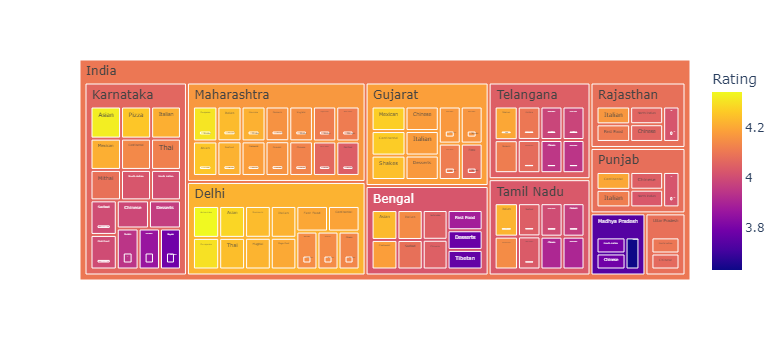

In [62]:
top_cuisine_india['Country'] = 'India'
fig = px.treemap(top_cuisine_india, 
                 path = ['Country', 'State', 'Cuisine', 'Total Votes'], 
                 values = 'Rating',
                 color = 'Rating'
                )
fig.show()

Inference 8: What are top restaurant locations in Maharashtra, Delhi and Karnataka?

In [63]:
df.head()

Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  \
0           North Indian,  Finger Food,  Continental     4.1   2415  2000   
1                                       North Indian     4.3   2363  1500   
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000   
3  North Indian,  Mediterranean,  Asian,  Italian...     4.2   2821  1800   
4                       Mexican,  American,  Italian     4.4   1094  2000   

       State  
0  Delhi NCR  
1  Delhi NCR  
2  Delhi NCR  
3  Delhi NCR  
4  Delhi NCR

8.1 Forming Individual Dataframes for all States

In [64]:
df_maharashtra = df[df['State'] == 'Maharashtra']
df_delhi = df[df['State'] == 'Delhi NCR']
df_karnataka = df[df['State'] == 'Karnataka']
df_maharashtra

Name  \
1114                 Pop Tate's   
1115              Global Fusion   
1116                        FOO   
1117              Kake Da Hotel   
1118               PizzaExpress   
...                         ...   
6460                  Roof Zero   
6461  Dublin 88 - The Irish Hub   
6462           Wonders Of World   
6463                The Habitat   
6464                     MiCasa   

                                               Location          Locality  \
1114  Mayfair Sonata Green CHS,Vikhroli West, Centra...   Central Suburbs   
1115      Times Square Tech Park,Sakinaka, Andheri East      Andheri East   
1116                     Vikhroli West, Central Suburbs   Central Suburbs   
1117                                       Powai, Powai             Powai   
1118             Hiranandani Business Park,Powai, Powai             Powai   
...                                                 ...               ...   
6460           Zero Degree,Hingna T Point, South Nagpur      South Nagpur   
6461                             Vayu Sena, West Nagpur       West Nagpur   
6462                             Vayu Sena, West Nagpur       West Nagpur   
6463                       Hingna T Point, South Nagpur      South Nagpur   
6464                             Gokulpeth, West Nagpur       West Nagpur   

        City                               Cuisine  Rating  Votes  Cost  \
1114  Mumbai       Chinese,  Italian,  Continental     4.3    333  2000   
1115  Mumbai        North Indian,  Chinese,  Sushi     4.5    716  2000   
1116  Mumbai    Asian,  Chinese,  Japanese,  Sushi     4.7     50  1100   
1117  Mumbai      North Indian,  Chinese,  Mughlai     5.0      1   900   
1118  Mumbai        European,  Fast Food,  Italian     4.5    590  1400   
...      ...                                   ...     ...    ...   ...   
6460  Nagpur  North Indian,  Chinese,  Continental     1.0      1  2200   
6461  Nagpur            North Indian,  Continental     3.6      5  1300   
6462  Nagpur  North Indian,  Chinese,  Continental     3.7     36   900   
6463  Nagpur  North Indian,  Chinese,  Continental     5.0      3  1000   
6464  Nagpur                North Indian,  Chinese     4.6      2  1200   

            State  
1114  Maharashtra  
1115  Maharashtra  
1116  Maharashtra  
1117  Maharashtra  
1118  Maharashtra  
...           ...  
6460  Maharashtra  
6461  Maharashtra  
6462  Maharashtra  
6463  Maharashtra  
6464  Maharashtra  

[1144 rows x 9 columns]

8.2 Defining Function to Return Votes in a Locality

In [65]:
def total_votes(locality):
    df_x = df[df['Locality'] == locality]
    total_votes = df_x['Votes'].sum()
    return total_votes


8.3 Obtaining Votes for all Localities in Maharashtra

In [66]:
# List of all localities
maharashtra_locations = df_maharashtra['Locality'].value_counts().index.tolist()

# Obtaining total votes 
total_votes_value = []
total_votes_list = []
for index, locality in enumerate(maharashtra_locations):
    total_votes_value = total_votes(locality) 
    total_votes_list.append(total_votes_value)
    
# Locality-wise total restuarants in Maharashtra 
maharashtra_location_counts = df_maharashtra['Locality'].value_counts()

# Zipping required lists and forming dataframe
list_of_tuples = list(zip(maharashtra_locations, maharashtra_location_counts, total_votes_list))
maharashtra_locations_df = pd.DataFrame(list_of_tuples, columns = ['Location', 'Total Restaurants', 'Total Votes'])
maharashtra_locations_df

Location  Total Restaurants  Total Votes
0            West Pune                171        17899
1            East Pune                141        13750
2        North Western                132        12533
3         South Mumbai                123        16632
4          Navi Mumbai                 93         6293
5         Andheri West                 78        10290
6               Bandra                 74         9141
7      Central Suburbs                 62         6997
8                Thane                 61         6567
9         Andheri East                 60         6855
10          South Pune                 39         2032
11         West Nagpur                 31          934
12               Powai                 26         4374
13        South Nagpur                 21          235
14           Dombivali                 15          584
15         East Nagpur                  7           55
16      Central Nagpur                  6          100
17   24 Parganas South                  3           17
18        North Nagpur                  1            6

In [67]:
df_maharashtra = df[df['State'] == 'Maharashtra']
df_delhi = df[df['State'] == 'Delhi NCR']
df_karnataka = df[df['State'] == 'Karnataka']
df_maharashtra

Name  \
1114                 Pop Tate's   
1115              Global Fusion   
1116                        FOO   
1117              Kake Da Hotel   
1118               PizzaExpress   
...                         ...   
6460                  Roof Zero   
6461  Dublin 88 - The Irish Hub   
6462           Wonders Of World   
6463                The Habitat   
6464                     MiCasa   

                                               Location          Locality  \
1114  Mayfair Sonata Green CHS,Vikhroli West, Centra...   Central Suburbs   
1115      Times Square Tech Park,Sakinaka, Andheri East      Andheri East   
1116                     Vikhroli West, Central Suburbs   Central Suburbs   
1117                                       Powai, Powai             Powai   
1118             Hiranandani Business Park,Powai, Powai             Powai   
...                                                 ...               ...   
6460           Zero Degree,Hingna T Point, South Nagpur      South Nagpur   
6461                             Vayu Sena, West Nagpur       West Nagpur   
6462                             Vayu Sena, West Nagpur       West Nagpur   
6463                       Hingna T Point, South Nagpur      South Nagpur   
6464                             Gokulpeth, West Nagpur       West Nagpur   

        City                               Cuisine  Rating  Votes  Cost  \
1114  Mumbai       Chinese,  Italian,  Continental     4.3    333  2000   
1115  Mumbai        North Indian,  Chinese,  Sushi     4.5    716  2000   
1116  Mumbai    Asian,  Chinese,  Japanese,  Sushi     4.7     50  1100   
1117  Mumbai      North Indian,  Chinese,  Mughlai     5.0      1   900   
1118  Mumbai        European,  Fast Food,  Italian     4.5    590  1400   
...      ...                                   ...     ...    ...   ...   
6460  Nagpur  North Indian,  Chinese,  Continental     1.0      1  2200   
6461  Nagpur            North Indian,  Continental     3.6      5  1300   
6462  Nagpur  North Indian,  Chinese,  Continental     3.7     36   900   
6463  Nagpur  North Indian,  Chinese,  Continental     5.0      3  1000   
6464  Nagpur                North Indian,  Chinese     4.6      2  1200   

            State  
1114  Maharashtra  
1115  Maharashtra  
1116  Maharashtra  
1117  Maharashtra  
1118  Maharashtra  
...           ...  
6460  Maharashtra  
6461  Maharashtra  
6462  Maharashtra  
6463  Maharashtra  
6464  Maharashtra  

[1144 rows x 9 columns]

8.4 Adding Attributes to the Localities Dataframe

In [68]:
df_statedf_location = pd.DataFrame()
rating_list = []
cost_list = []
location_rating_list = []
location_cost_list = []

for index, location in enumerate(maharashtra_locations_df['Location']):
    df_location = df[df['Locality'] == location]

#     Calculating average rating

    for rating in df_location["Rating"]:
        rating_list.append(rating)
    avg_rating = sum(rating_list)/len(rating_list)
    location_rating_list.append(avg_rating)
    
#     Calculating average cost

    for cost in df_location["Cost"]:
        cost_list.append(cost)
    avg_cost = sum(cost_list)/len(cost_list)
    location_cost_list.append(avg_cost)

#     Adding attributes to the dataframe
maharashtra_locations_df['Rating'] = location_rating_list
maharashtra_locations_df['Cost'] = location_cost_list
top_locations_maharashtra = maharashtra_locations_df[maharashtra_locations_df['Total Votes']>150]
top_locations_maharashtra['Total Votes'] = top_locations_maharashtra['Total Votes'].astype('str') + ' votes'

8.5 Similarly Obtaining Dataframes for Delhi and Karnataka

Obtaining Dataframe for Delhi

In [69]:
# Obtaining total votes for all localities in Delhi

# List of all localities
delhi_locations = df_delhi['Locality'].value_counts().index.tolist()

# Obtaining total votes
total_votes_value = []
total_votes_list = []
for index, locality in enumerate(delhi_locations):
    total_votes_value = total_votes(locality) 
    total_votes_list.append(total_votes_value)
    
# Locality-wise total restuarants in Maharashtra 
delhi_location_counts = df_delhi['Locality'].value_counts()

# Zipping required lists and forming dataframe
list_of_tuples = list(zip(delhi_locations, delhi_location_counts, total_votes_list))
delhi_locations_df = pd.DataFrame(list_of_tuples, columns = ['Location', 'Total Restaurants', 'Total Votes'])
delhi_locations_df

Location  Total Restaurants  Total Votes
0         South Delhi                339        67606
1             Gurgaon                184        40177
2          West Delhi                173        58240
3       Central Delhi                111        64055
4               Noida                 96        25907
5         North Delhi                 74        26189
6           Ghaziabad                 50         6440
7           Faridabad                 40         2984
8          East Delhi                 37         7396
9   NCR Greater Noida                 10          419

In [70]:
#Adding attributes to the localities dataframe
df_location = pd.DataFrame()
rating_list = []
cost_list = []
location_rating_list = []
location_cost_list = []

for index, location in enumerate(delhi_locations_df['Location']):
    df_location = df[df['Locality'] == location]

#Calculating average rating

    for rating in df_location["Rating"]:
        rating_list.append(rating)
    avg_rating = sum(rating_list)/len(rating_list)
    location_rating_list.append(avg_rating)
    
#Calculating average cost

    for cost in df_location["Cost"]:
        cost_list.append(cost)
    avg_cost = sum(cost_list)/len(cost_list)
    location_cost_list.append(avg_cost)

#Adding attributes to the dataframe
delhi_locations_df['Rating'] = location_rating_list
delhi_locations_df['Cost'] = location_cost_list
delhi_locations_df.head(20)
top_locations_delhi = delhi_locations_df[delhi_locations_df['Total Votes']>150]
top_locations_delhi['Total Votes'] = top_locations_delhi['Total Votes'].astype('str') + ' votes'

Obtaining dataframe for Karnataka

In [71]:
# Obtaining total votes for all localities in Delhi

# List of all localities
karnataka_locations = df_karnataka['Locality'].value_counts().index.tolist()

# Obtaining total votes
total_votes_value = []
total_votes_list = []
for index, locality in enumerate(karnataka_locations):
    total_votes_value = total_votes(locality) 
    total_votes_list.append(total_votes_value)
    
# Locality-wise total restuarants in Maharashtra 
karnataka_location_counts = df_karnataka['Locality'].value_counts()

# Zipping required lists and forming dataframe
list_of_tuples = list(zip(karnataka_locations, karnataka_location_counts, total_votes_list))
karnataka_locations_df = pd.DataFrame(list_of_tuples, columns = ['Location', 'Total Restaurants', 'Total Votes'])
karnataka_locations_df

Location  Total Restaurants  Total Votes
0               South Bangalore                364        38106
1                East Bangalore                235        25955
2               North Bangalore                170        14165
3             Central Bangalore                128        15851
4                West Bangalore                119         8002
5                Mysore Highway                  1            5
6   Bangalore Mangalore Highway                  1            8
7                  North Mysore                  1           22

In [72]:
#     Adding attributes to the localities dataframe
df_location = pd.DataFrame()
rating_list = []
cost_list = []
location_rating_list = []
location_cost_list = []

for index, location in enumerate(karnataka_locations_df['Location']):
    df_location = df[df['Locality'] == location]

#     Calculating average rating

    for rating in df_location["Rating"]:
        rating_list.append(rating)
    avg_rating = sum(rating_list)/len(rating_list)
    location_rating_list.append(avg_rating)
    
#     Calculating average cost

    for cost in df_location["Cost"]:
        cost_list.append(cost)
    avg_cost = sum(cost_list)/len(cost_list)
    location_cost_list.append(avg_cost)

#     Adding attributes to the dataframe
karnataka_locations_df['Rating'] = location_rating_list
karnataka_locations_df['Cost'] = location_cost_list
# karnataka_locations_df.head(20)

top_locations_karnataka = karnataka_locations_df[karnataka_locations_df['Total Votes']>150]
top_locations_karnataka['Total Votes'] = top_locations_karnataka['Total Votes'].astype('str') + ' votes'

In [73]:
top_locations_karnataka.head()

Location  Total Restaurants  Total Votes    Rating        Cost
0     South Bangalore                364  38106 votes  4.065934  841.758242
1      East Bangalore                235  25955 votes  4.047412  904.507513
2     North Bangalore                170  14165 votes  4.033030  880.104031
3   Central Bangalore                128  15851 votes  4.044928  947.101449
4      West Bangalore                119   8002 votes  4.030118  924.950787

8.6 Plotting Treemaps

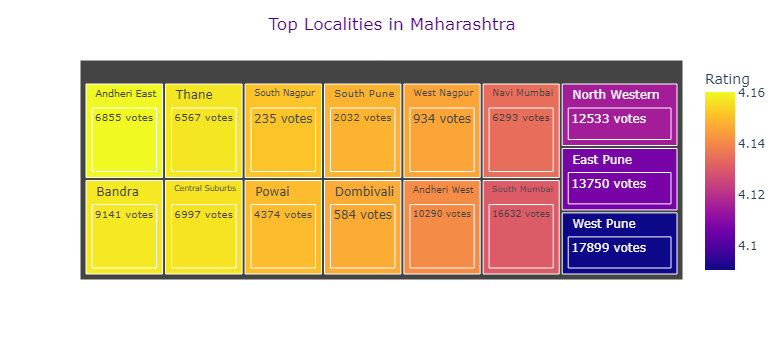

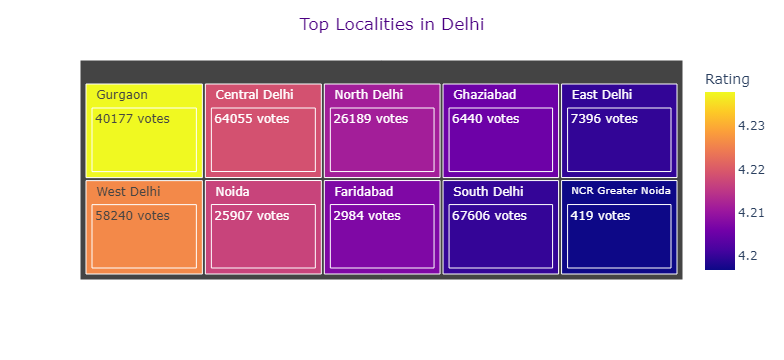

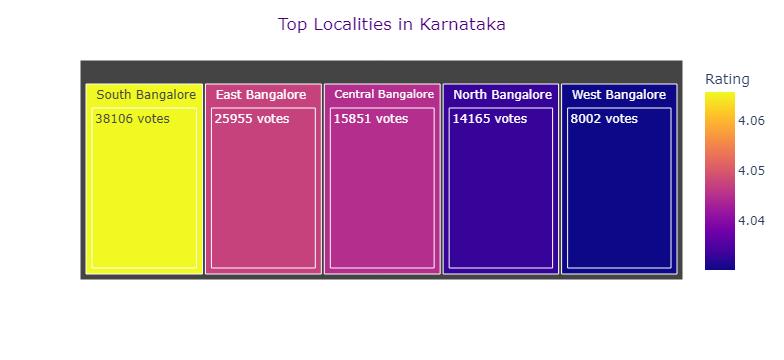

In [74]:
fig = px.treemap(top_locations_maharashtra, 
                 path=['Location', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                 labels = {'Votes'}
                )
fig.update_layout( title_text = 'Top Localities in Maharashtra',
                  title_font_color = '#4B0082',
                  title_x = 0.5,
                 )
fig.show()



fig = px.treemap(top_locations_delhi, 
                 path=['Location', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                 labels = {'Votes'}
                )
fig.update_layout( title_text = 'Top Localities in Delhi',
                  title_font_color = '#4B0082',
                  title_x = 0.5,
                 )
fig.show()



fig = px.treemap(top_locations_karnataka, 
                 path=['Location', 'Total Votes'], 
                 values='Rating',
                 color='Rating',
                 labels = {'Votes'}
                )
fig.update_layout( title_text = 'Top Localities in Karnataka',
                  title_font_color = '#4B0082',
                  title_x = 0.5,
                 )
fig.show()



In [75]:
df.tail()

Name                                           Location  \
6588  Shree Rathnam                 Wave Mall,BRS Nagar, West Ludhiana   
6589    Cafe Delish          Radisson Blu,Rajguru Nagar, West Ludhiana   
6590    3 K Resorts                           BRS Nagar, West Ludhiana   
6591      Dovka Bar  Nirvana Hotel Banquets Club,PAU, Central Ludhiana   
6592    Urban Vibes                         Aggar Nagar, West Ludhiana   

               Locality      City  \
6588      West Ludhiana  Ludhiana   
6589      West Ludhiana  Ludhiana   
6590      West Ludhiana  Ludhiana   
6591   Central Ludhiana  Ludhiana   
6592      West Ludhiana  Ludhiana   

                                                Cuisine  Rating  Votes  Cost  \
6588                                       South Indian     4.1     20   600   
6589  Multi-Cuisine,  North Indian,  Continental,  A...     4.4     48  3100   
6590                                       North Indian     1.0      1  1100   
6591               North Indian,  Chinese,  Finger Food     4.3      3  1500   
6592  Multi-Cuisine,  North Indian,  Italian,  Chine...     3.8     12  2000   

       State  
6588  Punjab  
6589  Punjab  
6590  Punjab  
6591  Punjab  
6592  Punjab

                             Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  \
0           North Indian,  Finger Food,  Continental     4.1   2415  2000   
1                                       North Indian     4.3   2363  1500   
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000   
3  North Indian,  Medite

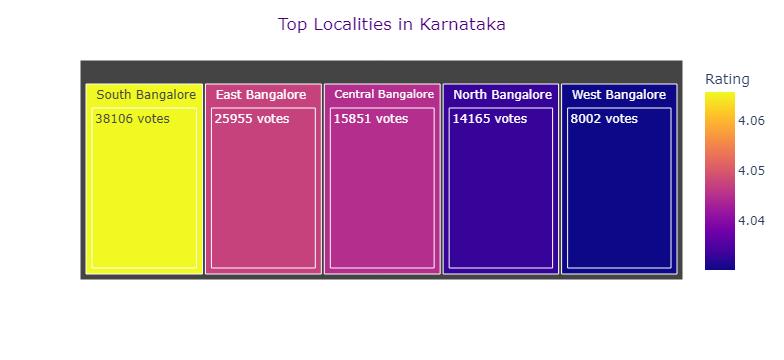

In [76]:
print(df.head())
fig. show()

In [77]:
# Python program to demonstrate
# Adding Elements to a Array

In [78]:
# importing "array" for array creations
import array as arr

In [79]:
# array with int type
a = arr.array('i', [1, 2, 3])

In [80]:
print("Array before insertion : ", end=" ")
for i in range(0, 3):
    print(a[i], end=" ")
print()

Array before insertion :  1 2 3 


In [81]:
# inserting array using
# insert() function
a.insert(1, 4)
 

In [82]:
print("Array after insertion : ", end=" ")
for i in (a):
    print(i, end=" ")
print()

Array after insertion :  1 4 2 3 


In [83]:
# array with float type
b = arr.array('d', [2.5, 3.2, 3.3])

In [84]:
print("Array before insertion : ", end=" ")
for i in range(0, 3):
    print(b[i], end=" ")
print()

Array before insertion :  2.5 3.2 3.3 


In [85]:
# adding an element using append()
b.append(4.4)

In [86]:
print("Array after insertion : ", end=" ")
for i in (b):
    print(i, end=" ")
print()

Array after insertion :  2.5 3.2 3.3 4.4 


In [87]:
# accessing element of array
print("Access element is: ", b[1])
 
# accessing element of array
print("Access element is: ", b[2])

Access element is:  3.2
Access element is:  3.3


In [88]:
# Creating a Set with
# the use of a List
set1 = set(["Geeks", "For", "Geeks"])
print("\nSet with the use of List: ")
print(set1)


Set with the use of List: 
{'For', 'Geeks'}


In [90]:

# global variable
a = 15
b = 10
 
# function to perform addition
def add():
    c = a + b
    print(c)
 
 
# calling a function
add()

25


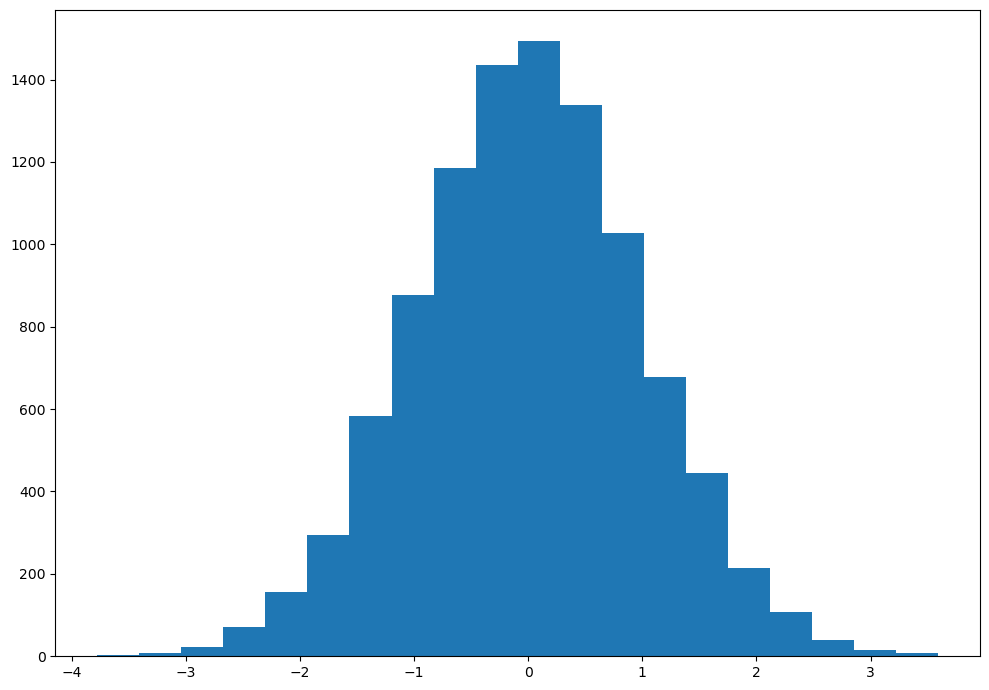

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 
# Creating dataset
np.random.seed(23685752)
N_points = 10000
n_bins = 20
 
# Creating distribution
x = np.random.randn(N_points)
y = .8 ** x + np.random.randn(10000) + 25
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
 
# Show plot
plt.show()

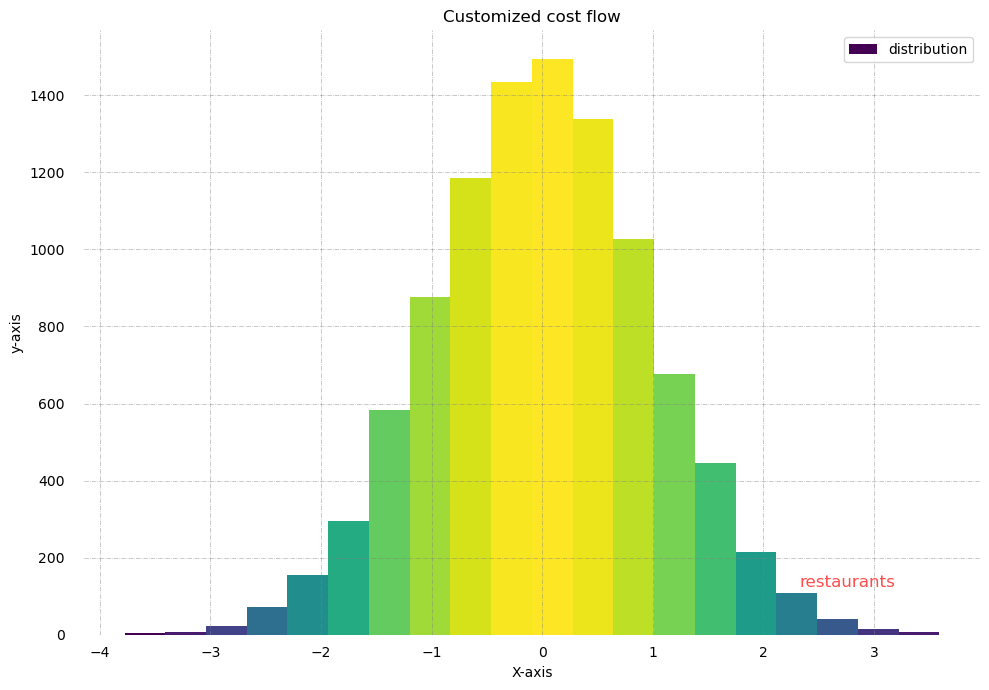

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 
 
# Creating dataset
np.random.seed(23685752)
N_points = 10000
n_bins = 20
 
# Creating cuisine
x = np.random.randn(N_points)
y = .8 ** x + np.random.randn(10000) + 25
legend = ['distribution']
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
 
# Add Text watermark
fig.text(0.9, 0.15, 'restaurants',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)
 
# Creating histogram
N, bins, patches = axs.hist(x, bins = n_bins)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.legend(legend)
plt.title('Customized cost flow')
 
# Show plot
plt.show()

In [105]:
# importing package
import matplotlib.pyplot as plt

df = pd.read_csv('restaurants.csv')

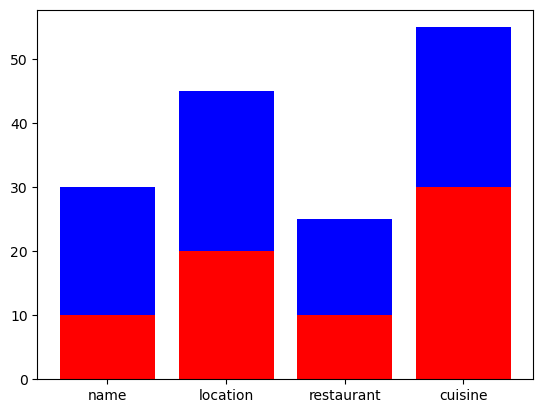

In [106]:
# create data
x = ['name', 'location', 'restaurant', 'cuisine']
y1 = [10, 20, 10, 30]
y2 = [20, 25, 15, 25]
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

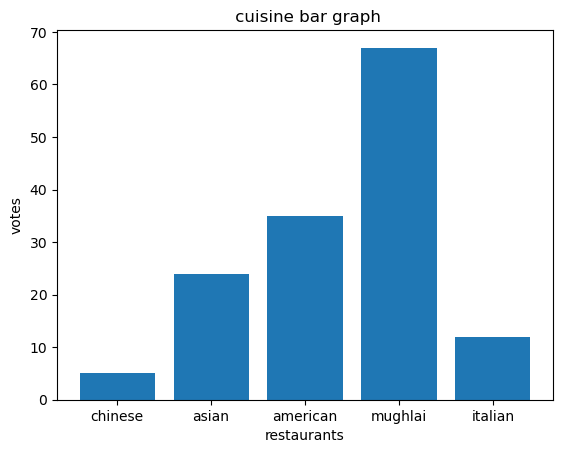

In [113]:

import matplotlib.pyplot as plt
 
x=['chinese', 'asian', 'american', 'mughlai', 'italian']
 
# giving the values against
# each value at x axis
y=[5, 24, 35, 67, 12]
plt.bar(x, y)
 
# setting x-label as pen sold
plt.xlabel("restaurants")
 
# setting y_label as price
plt.ylabel("votes")  
plt.title(" cuisine bar graph")
plt.show()

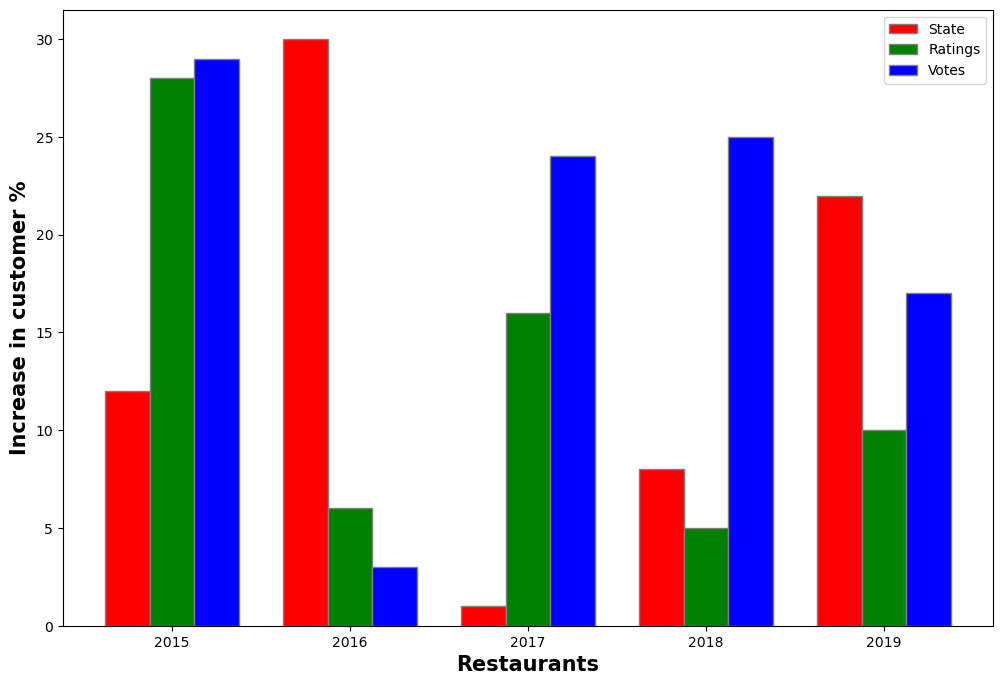

In [121]:

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
State = [12, 30, 1, 8, 22]
Ratings = [28, 6, 16, 5, 10]
Votes = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='State')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Ratings')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Votes')
 
# Adding Xticks
plt.xlabel('Restaurants', fontweight ='bold', fontsize = 15)
plt.ylabel('Increase in customer %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()